In [7]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/MyDrive/Diplomski/2. semestar/MREŽE/data"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Diplomski/2. semestar/MREŽE/data
categories.csv	difficulties.csv  games.csv  games_players.csv	players.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import networkx as nx

from networkx.algorithms.community import louvain_communities
import matplotlib.cm as cm
import matplotlib.colors as colors
from networkx.algorithms.cuts import conductance

#Uvoz podataka

##Games_players

In [8]:
df_g_p = pd.read_csv('games_players.csv')
df_g_p.head(5)

game_id                             player_id  \
0  003866ee-e44b-4ec9-bc06-c87f1878f596  04bc0b12-6ab0-4ebb-8d10-405c6aa0acad   
1  003866ee-e44b-4ec9-bc06-c87f1878f596  0c06b23a-2cb4-4da1-83c8-9467b4ced114   
2  003866ee-e44b-4ec9-bc06-c87f1878f596  4bf5788a-cca8-4607-b8fc-e07f6dfb20a8   
3  003866ee-e44b-4ec9-bc06-c87f1878f596  4dfd6d59-4628-4478-89e3-0b8c34c14faa   
4  003866ee-e44b-4ec9-bc06-c87f1878f596  66564d8b-eca8-4c18-b885-a1b475459f9b   

   winner  
0   False  
1    True  
2   False  
3   False  
4   False

In [ ]:
df_g_p.shape

(6997, 3)

##Game

In [9]:
df_games = pd.read_csv('games.csv')
df_games = df_games.drop(columns = ["current_question_id"])
df_games.rename(columns={'id': 'game_id'}, inplace=True)
df_games.head(5)

game_id                  created_at status  \
0  003866ee-e44b-4ec9-bc06-c87f1878f596   2025-05-13 15:11:00.73341  ended   
1  003cfc00-2d73-43e4-8547-3d9acb1ac3db   2025-05-13 15:11:00.73341  ended   
2  01caf85f-3e0a-44b6-9b74-a7b6781db49f  2025-04-30 10:21:48.618287  ended   
3  02d6e952-0e6e-44d2-8a2d-ef24085508ca  2025-04-30 10:21:48.618287  ended   
4  034b54b6-a08e-4c84-8fb3-2c7c5b5fa28c   2025-05-13 15:11:00.73341  ended   

                            category_id                         difficulty_id  
0  4703693c-f9af-4009-981d-78caba5d1eeb  dcbeeab3-ecc3-41f0-a121-5eb895cb6712  
1  0706bdbe-9880-48f4-a293-2b92afd448dd  5a65ee9d-974c-49be-b5ee-067c9846dfd7  
2  759e334b-5575-4192-a837-42cd2c6bcac9  71f0d710-9699-4d72-b805-22fa7862060e  
3  0feeb208-4e91-40f3-bd7a-ec0ffb9cd86f  dcbeeab3-ecc3-41f0-a121-5eb895cb6712  
4  22f5969e-e4e2-45ff-873c-c5888ffefd72  5a65ee9d-974c-49be-b5ee-067c9846dfd7

In [ ]:
df_games.shape

(502, 5)

In [10]:
#filtriraj podatke iz df_games -> samo oni koji su u df_g_p
game_ids_in_g_p = df_g_p['game_id'].unique()
df_games = df_games[df_games['game_id'].isin(game_ids_in_g_p)]
df_games.shape

(502, 5)

##Player

In [11]:
df_players = pd.read_csv('players.csv')
df_players= df_players.drop(columns = ["password", "email", "created_at"])
df_players.rename(columns={'id': 'player_id'}, inplace=True)
df_players.head(5)

player_id            username  skill_level
0  76da6b0d-33bf-4aa8-bf13-c7621a73950b             racun47            0
1  30055205-f1ea-4407-8672-d4cde8911b8e             marta12         9999
2  5882f3e6-b172-40b6-9532-89dd663d73c7  asdfjklčasdfghjklč            0
3  f5893e86-1845-4f30-9394-b80fe03161eb               mbwy3            0
4  9faf73aa-0772-4f93-9c8b-93b7ada00806          msteinham4            0

In [ ]:
df_players.shape

(1000, 3)

In [12]:
#filtriraj podatke iz df_players -> samo oni koji su u df_g_p
player_ids_in_g_p = df_g_p['player_id'].unique()
df_players = df_players[df_players['player_id'].isin(player_ids_in_g_p)]
df_players.head()

player_id            username  skill_level
0  76da6b0d-33bf-4aa8-bf13-c7621a73950b             racun47            0
1  30055205-f1ea-4407-8672-d4cde8911b8e             marta12         9999
2  5882f3e6-b172-40b6-9532-89dd663d73c7  asdfjklčasdfghjklč            0
3  f5893e86-1845-4f30-9394-b80fe03161eb               mbwy3            0
4  9faf73aa-0772-4f93-9c8b-93b7ada00806          msteinham4            0

In [ ]:
df_players.shape

(1000, 3)

##Categories


In [13]:
df_categ = pd.read_csv('categories.csv')
df_categ.rename(columns={'id': 'category_id', "name": "categ_name"}, inplace=True)
df_categ.head(5)

category_id                 categ_name
0  03781677-996d-4263-83cc-4977827247e3      Entertainment: Comics
1  0706bdbe-9880-48f4-a293-2b92afd448dd  Entertainment: Television
2  0f25f7a4-027d-4186-a8ba-9c538b59f502                Celebrities
3  0feeb208-4e91-40f3-bd7a-ec0ffb9cd86f                  Mythology
4  22f5969e-e4e2-45ff-873c-c5888ffefd72       Science: Mathematics

##Difficulties

In [14]:
df_diff = pd.read_csv('difficulties.csv')
df_diff.rename(columns={'id': 'difficulty_id', "name": "diff_name"}, inplace=True)
df_diff.head(5)

difficulty_id   level  score
0  5a65ee9d-974c-49be-b5ee-067c9846dfd7  medium     15
1  71f0d710-9699-4d72-b805-22fa7862060e    hard     20
2  dcbeeab3-ecc3-41f0-a121-5eb895cb6712    easy     10

##Merge data

In [15]:
merged_df = pd.DataFrame()
merged_df = pd.merge(df_g_p, df_games, on='game_id')
merged_df = pd.merge(merged_df, df_diff, on='difficulty_id')
merged_df = pd.merge(merged_df, df_players, on='player_id')
merged_df = pd.merge(merged_df, df_categ, on='category_id')
winners_df = pd.DataFrame()

winners_df = merged_df[merged_df['winner'] == True]

# Update skill_level in df_players
for index, row in winners_df.iterrows():
    player_id = row['player_id']
    score_to_add = row['score']

    # Find the player in df_players and update skill_level
    df_players.loc[df_players['player_id'] == player_id, 'skill_level'] += score_to_add

In [ ]:
merged_df.head(3).T

0  \
game_id        003866ee-e44b-4ec9-bc06-c87f1878f596   
player_id      04bc0b12-6ab0-4ebb-8d10-405c6aa0acad   
winner                                        False   
created_at                2025-05-13 15:11:00.73341   
status                                        ended   
category_id    4703693c-f9af-4009-981d-78caba5d1eeb   
difficulty_id  dcbeeab3-ecc3-41f0-a121-5eb895cb6712   
level                                          easy   
score                                            10   
username                               cfissendengg   
skill_level                                       0   
categ_name                        General Knowledge   

                                                  1  \
game_id        003866ee-e44b-4ec9-bc06-c87f1878f596   
player_id      0c06b23a-2cb4-4da1-83c8-9467b4ced114   
winner                                         True   
created_at                2025-05-13 15:11:00.73341   
status                                        ended   
category_id    4703693c-f9af-4009-981d-78caba5d1eeb   
difficulty_id  dcbeeab3-ecc3-41f0-a121-5eb895cb6712   
level                                          easy   
score                                            10   
username                                 lswepsonqf   
skill_level                                       0   
categ_name                        General Knowledge   

                                                  2  
game_id        003866ee-e44b-4ec9-bc06-c87f1878f596  
player_id      4bf5788a-cca8-4607-b8fc-e07f6dfb20a8  
winner                                        False  
created_at                2025-05-13 15:11:00.73341  
status                                        ended  
category_id    4703693c-f9af-4009-981d-78caba5d1eeb  
difficulty_id  dcbeeab3-ecc3-41f0-a121-5eb895cb6712  
level                                          easy  
score                                            10  
username                               smullineuxhx  
skill_level                                       0  
categ_name                        General Knowledge

#Analysis

##Player Analysis

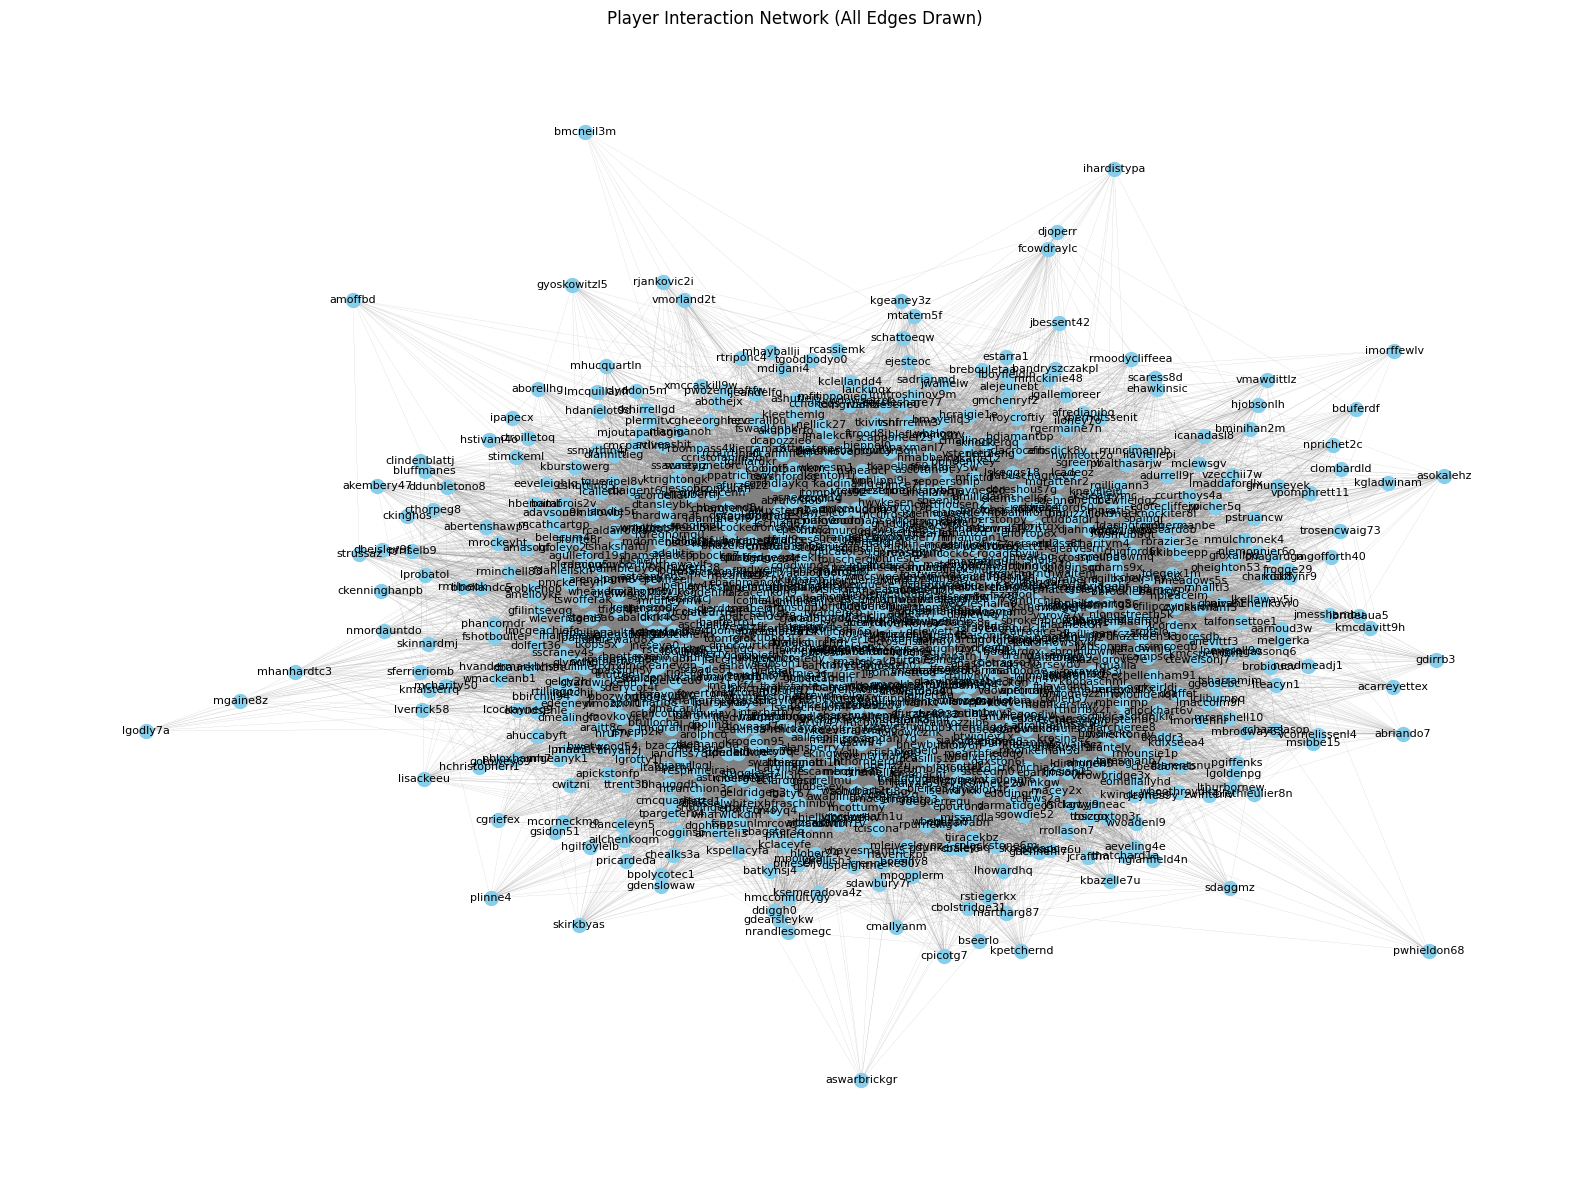

In [16]:
game_players = merged_df.groupby('game_id')['username'].apply(list).reset_index()

player_pairs = []
for index, row in game_players.iterrows():
    players_in_game = row['username']
    player_pairs.extend(list(itertools.combinations(players_in_game, 2)))


edges_df = pd.DataFrame(player_pairs, columns=["player_1", "player_2"])
edges_df["weight"] = 1
edges_df = edges_df.groupby(["player_1", "player_2"])["weight"].sum().reset_index()


G = nx.Graph()

all_players = merged_df['username'].unique()
G.add_nodes_from(all_players)

for index, row in edges_df.iterrows():
    G.add_edge(row["player_1"], row["player_2"], weight=row["weight"])


plt.figure(figsize=(16, 12))

pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color="skyblue")

# Draw all edges
edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=[w*0.1 for w in edge_weights], edge_color="gray", alpha=0.7) # Adjust width scaling

# Filter labels based on degree (e.g., only show labels for nodes with degree > 5)
degrees = dict(G.degree())
labels = {node: node for node, deg in degrees.items() if deg > 5}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8) # Smaller font size

plt.title("Player Interaction Network (All Edges Drawn)")
plt.axis('off') # Hide axes
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

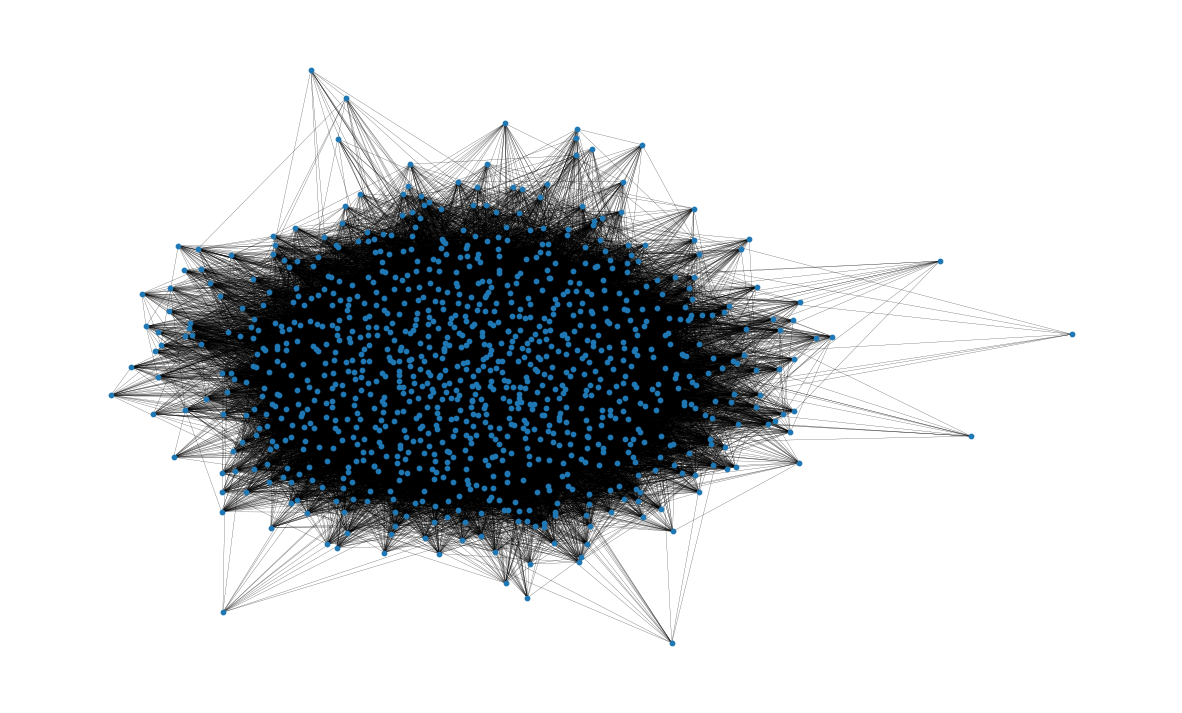

In [ ]:
pos = nx.spring_layout(G_collaboration)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G_collaboration, pos=pos, ax=ax, **plot_options)

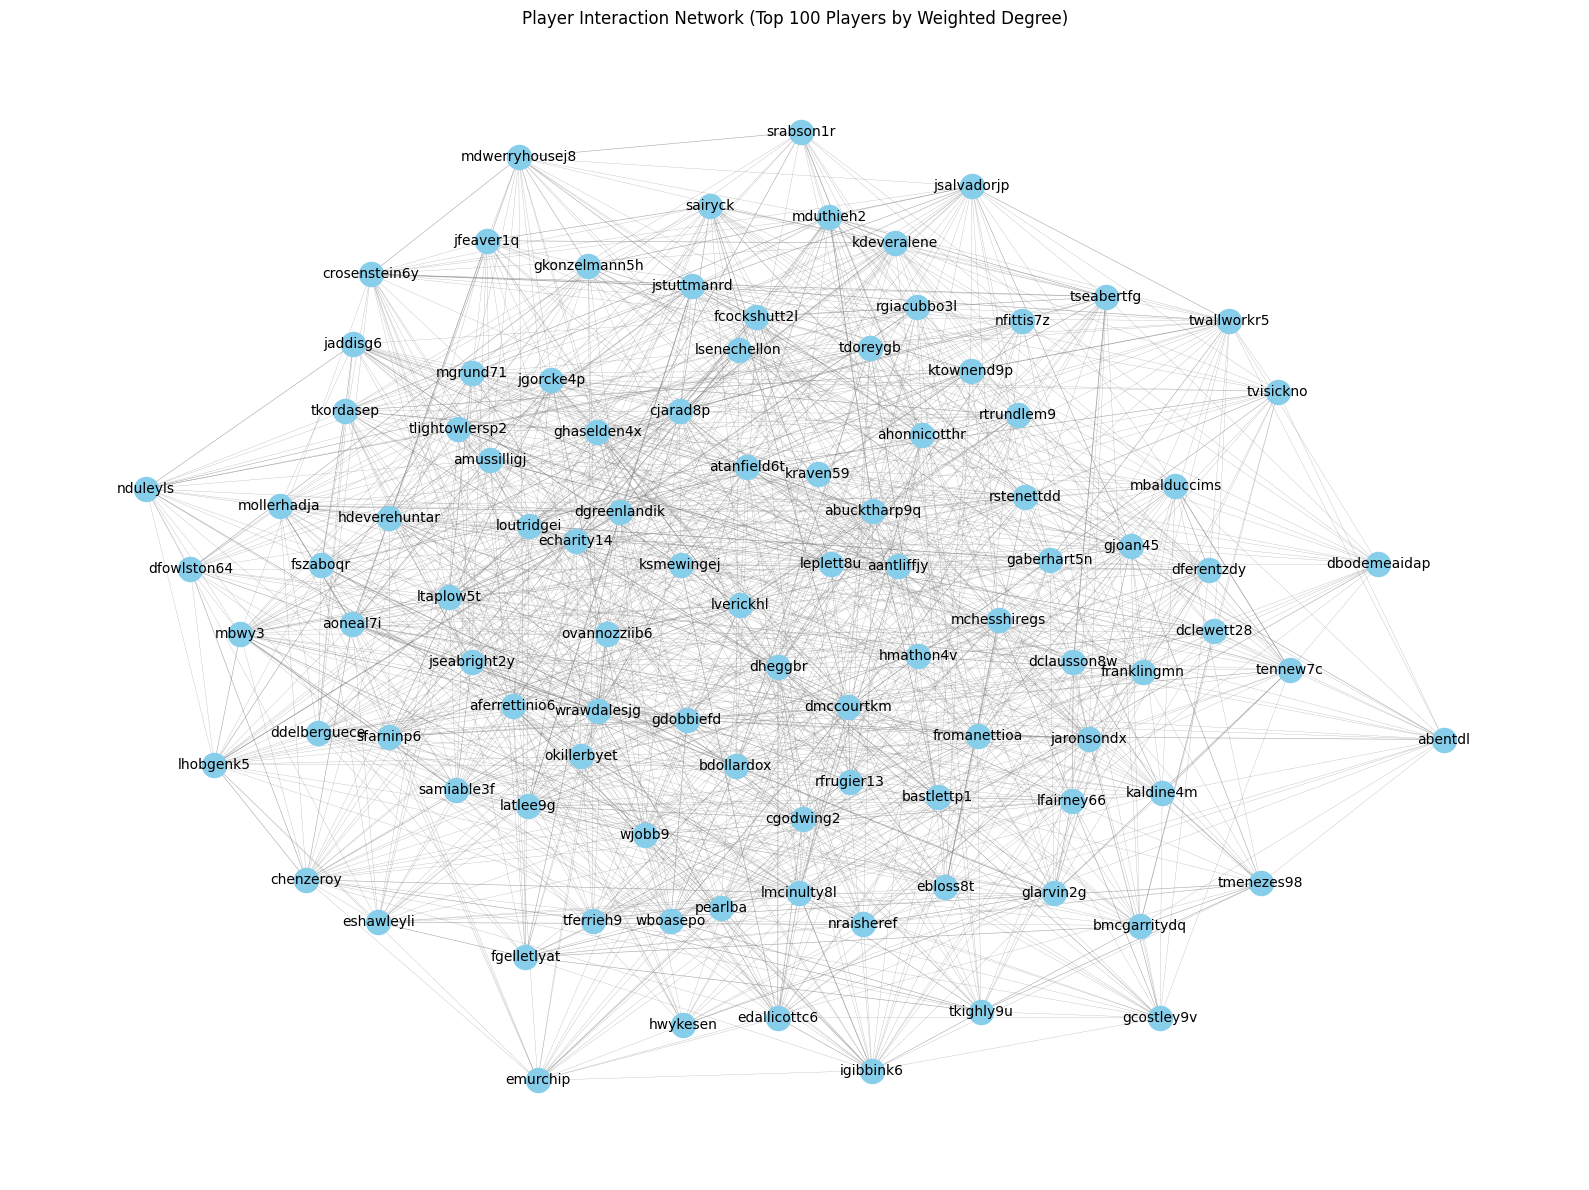

In [12]:
top = 100
game_players = merged_df.groupby('game_id')['username'].apply(list).reset_index()

player_pairs = []
for index, row in game_players.iterrows():
    players_in_game = row['username']
    player_pairs.extend(list(itertools.combinations(players_in_game, 2)))

edges_df = pd.DataFrame(player_pairs, columns=["player_1", "player_2"])
edges_df["weight"] = 1

edges_df = edges_df.groupby(["player_1", "player_2"])["weight"].sum().reset_index()

G = nx.Graph()

all_players = merged_df['username'].unique()
G.add_nodes_from(all_players)

for index, row in edges_df.iterrows():
    G.add_edge(row["player_1"], row["player_2"], weight=row["weight"])

weighted_degree = G.degree(weight='weight')
sorted_players_by_weighted_degree = sorted(weighted_degree, key=lambda item: item[1], reverse=True)

top_50_players = [player for player, degree in sorted_players_by_weighted_degree[:top]]
subgraph_G = G.subgraph(top_50_players)
plt.figure(figsize=(16, 12))

pos_subgraph = nx.spring_layout(subgraph_G, seed=42)
nx.draw_networkx_nodes(subgraph_G, pos_subgraph, node_size=300, node_color="skyblue")
edge_weights_subgraph = [d['weight'] for u, v, d in subgraph_G.edges(data=True)]
nx.draw_networkx_edges(subgraph_G, pos_subgraph, width=[w*0.2 for w in edge_weights_subgraph], edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(subgraph_G, pos_subgraph, font_size=10)

plt.title(f'Player Interaction Network (Top {top} Players by Weighted Degree)')
plt.axis('off')
plt.tight_layout()
plt.show()

Edge weights: min=1, max=3


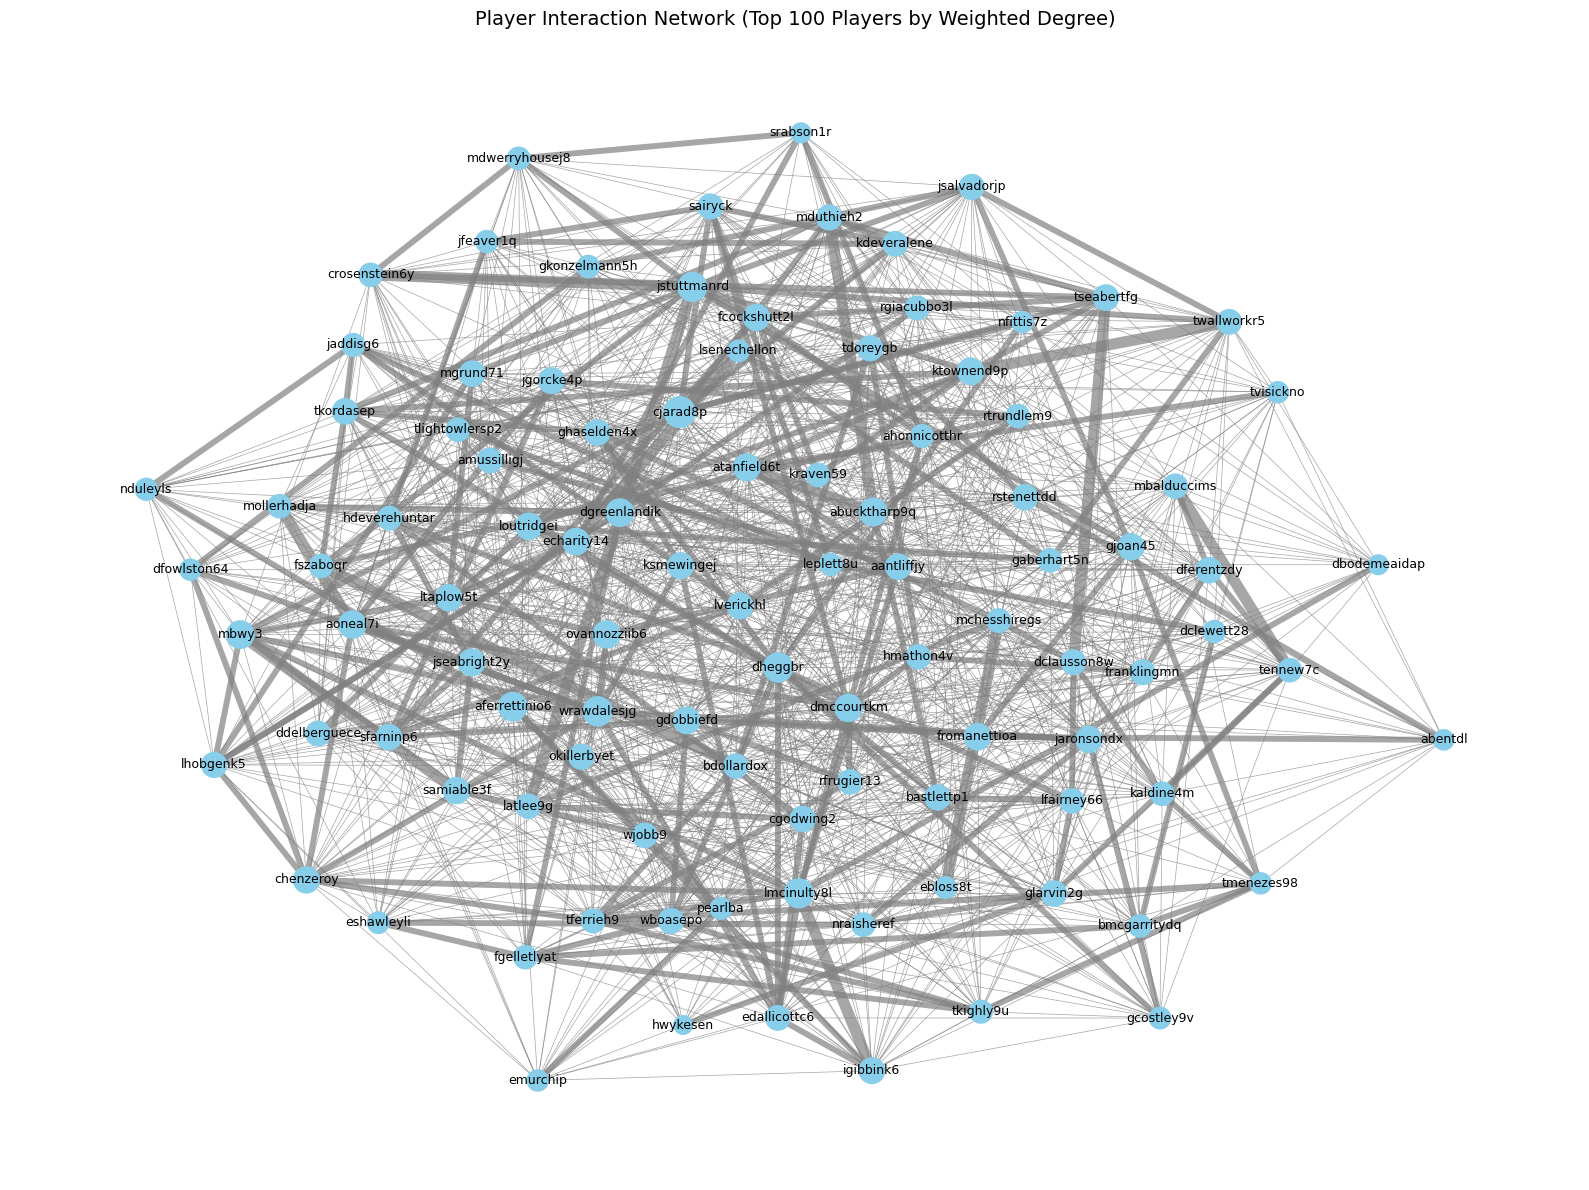

In [13]:
edge_weights_subgraph = [d['weight'] for u, v, d in subgraph_G.edges(data=True)]
print(f"Edge weights: min={min(edge_weights_subgraph)}, max={max(edge_weights_subgraph)}")

weights_np = np.array(edge_weights_subgraph)
min_w = weights_np.min()
max_w = weights_np.max()

norm_weights = (weights_np - min_w) / (max_w - min_w + 1e-6)
scaled_widths = norm_weights * 7.5 + 0.5

node_sizes = [subgraph_G.degree(n, weight='weight') * 10 for n in subgraph_G.nodes()]

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(subgraph_G, pos_subgraph, node_size=node_sizes, node_color="skyblue")
nx.draw_networkx_edges(subgraph_G, pos_subgraph, width=scaled_widths, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(subgraph_G, pos_subgraph, font_size=9)

plt.title(f'Player Interaction Network (Top {top} Players by Weighted Degree)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
density = nx.density(G)
print(f"Network Density: {density:.4f}")

avg_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering_coefficient:.4f}")

Network Density: 0.0951
Average Clustering Coefficient: 0.2650


In [18]:
game_players_list = merged_df.groupby('game_id')['player_id'].apply(list).reset_index()

player_collaboration_pairs = []
for index, row in game_players_list.iterrows():
    players_in_game = row['player_id']
    player_collaboration_pairs.extend(list(itertools.combinations(players_in_game, 2)))

collaboration_edges_df = pd.DataFrame(player_collaboration_pairs, columns=["player_1", "player_2"])
collaboration_edges_df["weight"] = 1
collaboration_edges_df = collaboration_edges_df.groupby(["player_1", "player_2"])["weight"].sum().reset_index()

G_collaboration = nx.Graph()

all_players = merged_df['player_id'].unique()
G_collaboration.add_nodes_from(all_players)

for index, row in collaboration_edges_df.iterrows():
    G_collaboration.add_edge(row["player_1"], row["player_2"], weight=row["weight"])

In [19]:
##who are the most "central" players in the network (e.g., players who frequently play with many different people)?
degree_centrality_collaboration = nx.degree_centrality(G_collaboration)
sorted_players_by_centrality = sorted(degree_centrality_collaboration.items(), key=lambda item: item[1], reverse=True)
player_id_to_username = df_players.set_index('player_id')['username'].to_dict()

print("--- Top 5 Players by Player Collaboration Degree Centrality ---")

for player_id, centrality_score in sorted_players_by_centrality[:5]:
    username = player_id_to_username.get(player_id, player_id)  # Get username, or use ID if not found
    print(f"Player: {username}, Degree Centrality: {centrality_score:.4f}")

--- Top 5 Players by Player Collaboration Degree Centrality ---
Player: wrawdalesjg, Degree Centrality: 0.2312
Player: dheggbr, Degree Centrality: 0.2092
Player: aferrettinio6, Degree Centrality: 0.1922
Player: mbalduccims, Degree Centrality: 0.1912
Player: dgreenlandik, Degree Centrality: 0.1902


In [20]:
player_betweenness_centrality = nx.betweenness_centrality(G_collaboration, weight='weight')
sorted_player_betweenness = sorted(player_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)

print("--- Top 5 Players by Player Collaboration Betweenness Centrality (WEIGHTED)---")
for player_id, centrality in sorted_player_betweenness[:5]:
    username = player_id_to_username.get(player_id, player_id)
    print(f"Player: {username}, Betweenness Centrality: {centrality:.4f}")

--- Top 5 Players by Player Collaboration Betweenness Centrality (WEIGHTED)---
Player: wrawdalesjg, Betweenness Centrality: 0.0050
Player: dheggbr, Betweenness Centrality: 0.0039
Player: mbalduccims, Betweenness Centrality: 0.0036
Player: jaronsondx, Betweenness Centrality: 0.0035
Player: gaberhart5n, Betweenness Centrality: 0.0034


In [18]:
player_closeness_centrality = nx.closeness_centrality(G_collaboration, distance='weight')
sorted_player_closeness = sorted(player_closeness_centrality.items(), key=lambda x: x[1], reverse=True)

print("--- Top 5 Players by Player Collaboration Closeness Centrality (Weighted) ---")
for player_id, score in sorted_player_closeness[:5]:
    username = player_id_to_username.get(player_id, player_id)
    print(f"Player: {username}, Closeness Centrality: {score:.4f}")

--- Top 5 Players by Player Collaboration Closeness Centrality (Weighted) ---
Player: wrawdalesjg, Closeness Centrality: 0.5578
Player: dheggbr, Closeness Centrality: 0.5513
Player: mbalduccims, Closeness Centrality: 0.5480
Player: hmathon4v, Closeness Centrality: 0.5474
Player: lhobgenk5, Closeness Centrality: 0.5471


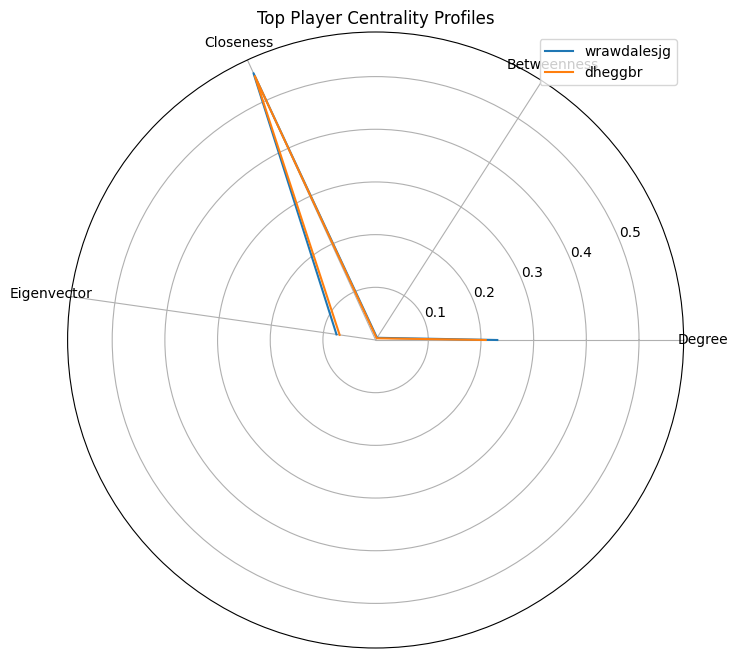

In [19]:
import matplotlib.pyplot as plt

# Create centrality radar chart for top players
metrics = ['Degree','Betweenness','Closeness','Eigenvector']
values = {
    'wrawdalesjg': [0.231, 0.0050, 0.557, 0.075],
    'dheggbr': [0.209, 0.0039, 0.551, 0.069]
}

fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'polar': True})
for player, vals in values.items():
    ax.plot(metrics, vals, label=player)
ax.set_title('Top Player Centrality Profiles')
plt.legend()
plt.show()

###Category

In [25]:
# Create a bipartite graph (players and categories are different types of nodes)
bipartite_graph = nx.Graph()

players = merged_df['player_id'].unique()
categories = merged_df['categ_name'].unique()
bipartite_graph.add_nodes_from(players, bipartite=0)
bipartite_graph.add_nodes_from(categories, bipartite=1)

for index, row in merged_df.iterrows():
    bipartite_graph.add_edge(row['player_id'], row['categ_name'])

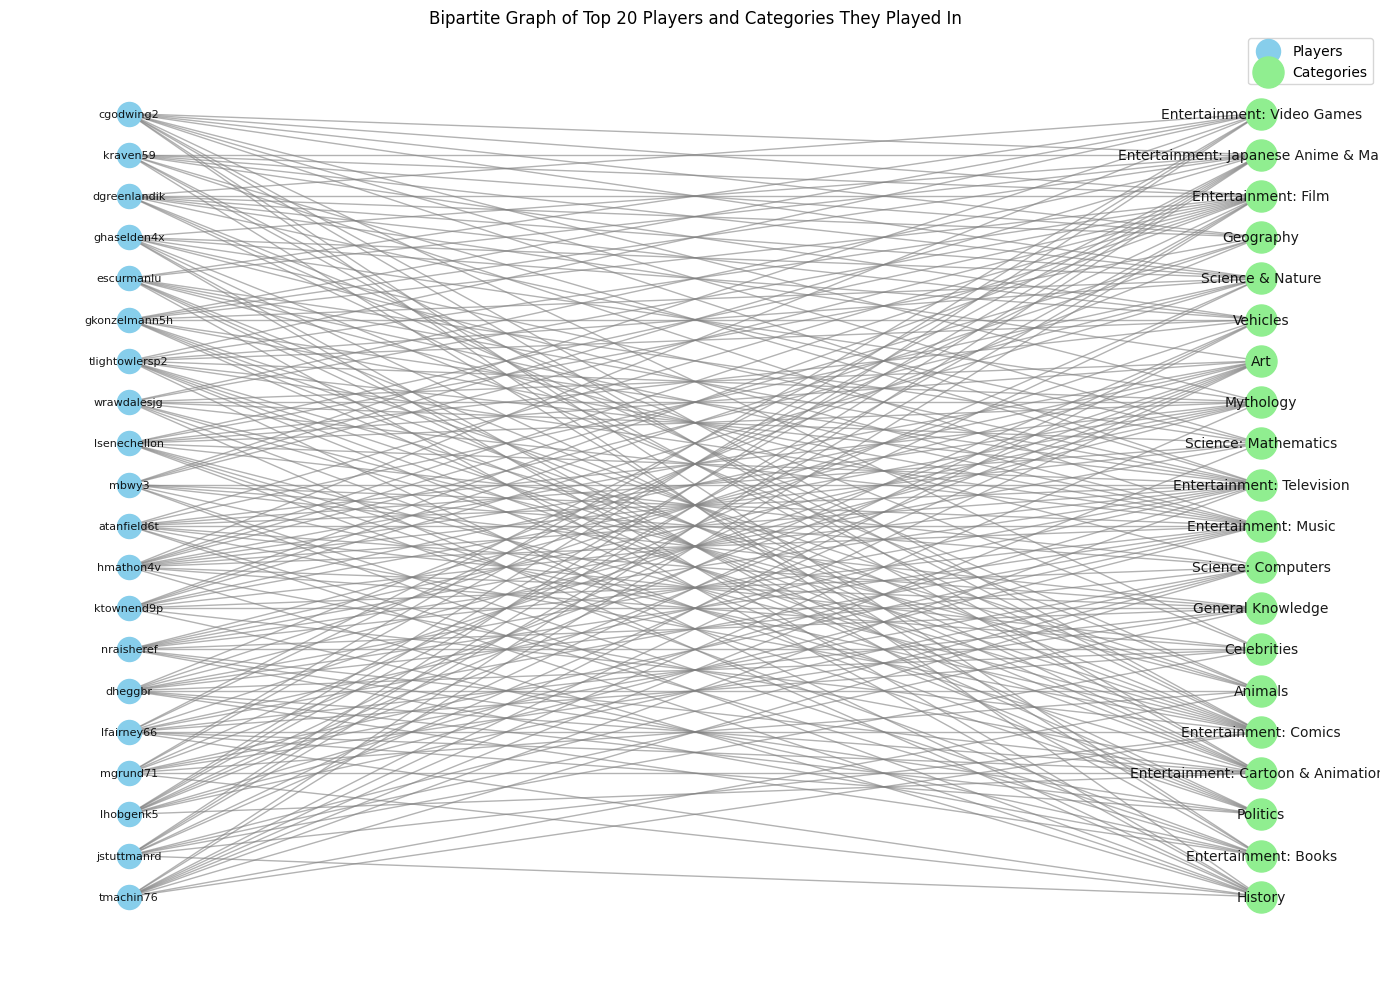

In [26]:
degree_centrality_bipartite = nx.degree_centrality(bipartite_graph)
player_degrees = {node: degree for node, degree in degree_centrality_bipartite.items() if node in players}
sorted_players_by_degree = sorted(player_degrees.items(), key=lambda item: item[1], reverse=True)
n_top_players = 20
top_players_for_viz = [player for player, degree in sorted_players_by_degree[:n_top_players]]

nodes_to_include = top_players_for_viz + list(categories)
subgraph_bipartite = bipartite_graph.subgraph(nodes_to_include).copy()

isolated_nodes = list(nx.isolates(subgraph_bipartite))
subgraph_bipartite.remove_nodes_from(isolated_nodes)

plt.figure(figsize=(14, 10))

subgraph_players = [n for n in subgraph_bipartite.nodes() if n in players]
subgraph_categories = [n for n in subgraph_bipartite.nodes() if n in categories]

pos_subgraph = nx.bipartite_layout(subgraph_bipartite, subgraph_players)

nx.draw_networkx_nodes(subgraph_bipartite, pos_subgraph, nodelist=subgraph_players, node_color='skyblue', node_size=300, label='Players')
nx.draw_networkx_nodes(subgraph_bipartite, pos_subgraph, nodelist=subgraph_categories, node_color='lightgreen', node_size=500, label='Categories')
nx.draw_networkx_edges(subgraph_bipartite, pos_subgraph, edge_color='gray', alpha=0.6)

player_labels_subgraph = {player_id: player_id_to_username.get(player_id, player_id) for player_id in subgraph_players}
nx.draw_networkx_labels(subgraph_bipartite, pos_subgraph, labels=player_labels_subgraph, font_size=8, alpha=0.9)
nx.draw_networkx_labels(subgraph_bipartite, pos_subgraph, labels={cat: cat for cat in subgraph_categories}, font_size=10, alpha=0.9)

plt.title(f"Bipartite Graph of Top {n_top_players} Players and Categories They Played In")
plt.legend(scatterpoints = 1)
plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
num_connected_components = nx.number_connected_components(bipartite_graph)
print(f"Number of Connected Components in Player Collaboration Graph: {num_connected_components}")

is_connected = nx.is_connected(bipartite_graph)
print(f"Is the Player Collaboration Graph Connected? {is_connected}")

if is_connected:
  diameter = nx.diameter(bipartite_graph)
  print(f"Diameter of Player Collaboration Graph: {diameter}")

avg_shortest_path = nx.average_shortest_path_length(bipartite_graph)
print(f"Average Shortest Path Length of Player Collaboration Graph: {avg_shortest_path:.4f}")

node_connectivity = nx.node_connectivity(bipartite_graph)
print(f"Node Connectivity of Player Collaboration Graph: {node_connectivity}")

edge_connectivity = nx.edge_connectivity(bipartite_graph)
print(f"Edge Connectivity of Player Collaboration Graph: {edge_connectivity}")

Number of Connected Components in Player Collaboration Graph: 1
Is the Player Collaboration Graph Connected? True
Diameter of Player Collaboration Graph: 4
Average Shortest Path Length of Player Collaboration Graph: 2.3020
Node Connectivity of Player Collaboration Graph: 1
Edge Connectivity of Player Collaboration Graph: 1


In [22]:
category_degree_centrality = nx.degree_centrality(bipartite_graph)
sorted_category_degree = sorted(category_degree_centrality.items(), key=lambda item: item[1], reverse=True)

print("--- Top 5 Categories by Degree Centrality ---")
for category, centrality in sorted_category_degree[:5]:
    print(f"Category: {category}, Degree Centrality: {centrality:.4f}")

--- Top 5 Categories by Degree Centrality ---
Category: Entertainment: Japanese Anime & Manga, Degree Centrality: 0.4298
Category: Entertainment: Music, Degree Centrality: 0.4181
Category: Entertainment: Video Games, Degree Centrality: 0.3788
Category: Entertainment: Television, Degree Centrality: 0.3533
Category: Entertainment: Film, Degree Centrality: 0.3160


In [23]:
category_betweenness_centrality = nx.betweenness_centrality(bipartite_graph, weight='weight')
sorted_category_betweenness = sorted(category_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

print("--- Top 5 Categories by Betweenness Centrality (Weighted) ---")
for category, score in sorted_category_betweenness[:5]:
    print(f"Category: {category}, Betweenness Centrality: {score:.4f}")

--- Top 5 Categories by Betweenness Centrality (Weighted) ---
Category: Entertainment: Japanese Anime & Manga, Betweenness Centrality: 0.1204
Category: Entertainment: Music, Betweenness Centrality: 0.1157
Category: Entertainment: Video Games, Betweenness Centrality: 0.0927
Category: Entertainment: Television, Betweenness Centrality: 0.0817
Category: Entertainment: Cartoon & Animations, Betweenness Centrality: 0.0648


In [24]:
category_closeness_centrality = nx.closeness_centrality(bipartite_graph)
category_closeness_centrality_filtered = {node: centrality for node, centrality in category_closeness_centrality.items() if node in categories}

print("--- Top 5 Categories by Closeness Centrality ---")
sorted_category_closeness = sorted(category_closeness_centrality_filtered.items(), key=lambda x: x[1], reverse=True)
for category_name, score in sorted_category_closeness[:5]:
    print(f"Category: {category_name}, Closeness Centrality: {score:.4f}")

--- Top 5 Categories by Closeness Centrality ---
Category: Entertainment: Japanese Anime & Manga, Closeness Centrality: 0.4713
Category: Entertainment: Music, Closeness Centrality: 0.4661
Category: Entertainment: Video Games, Closeness Centrality: 0.4497
Category: Entertainment: Television, Closeness Centrality: 0.4396
Category: Entertainment: Film, Closeness Centrality: 0.4256


In [25]:
category_eigenvector_centrality = nx.eigenvector_centrality(bipartite_graph, weight='weight', max_iter=1000)
sorted_category_eigenvector = sorted(category_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

print("--- Top 5 Categories by Eigenvector Centrality (Weighted) ---")
for category, score in sorted_category_eigenvector[:5]:
    print(f"Category: {category}, Eigenvector Centrality: {score:.4f}")

--- Top 5 Categories by Eigenvector Centrality (Weighted) ---
Category: Entertainment: Japanese Anime & Manga, Eigenvector Centrality: 0.2346
Category: Entertainment: Music, Eigenvector Centrality: 0.2302
Category: Entertainment: Video Games, Eigenvector Centrality: 0.2061
Category: Entertainment: Television, Eigenvector Centrality: 0.1929
Category: Entertainment: Film, Eigenvector Centrality: 0.1707


In [28]:
from networkx.algorithms import bipartite

# Project to player network (weighted by shared categories)
player_network = bipartite.weighted_projected_graph(bipartite_graph, subgraph_players)

# Detect communities
communities = nx.community.louvain_communities(player_network, resolution=1.5)
print(f"Found {len(communities)} player communities based on category overlap")

# Visualize
pos = nx.spring_layout(player_network)
nx.draw(player_network, pos, node_color=[assign_community_colors(n, communities) for n in player_network.nodes()])

Found 53 player communities based on category overlap


NameError: name 'assign_community_colors' is not defined

In [29]:
from sklearn.ensemble import IsolationForest

# Features: [degree, clustering, centrality]
X = np.array([[player_degrees[p], nx.clustering(bipartite_graph, p), nx.betweenness_centrality(bipartite_graph)[p]] for p in subgraph_players])
anomalies = IsolationForest().fit_predict(X)
print("Potential anomaly players:", [p for p, a in zip(subgraph_players, anomalies) if a == -1])

Potential anomaly players: ['2da0272a-0307-4398-b568-a09603a7035c', 'd15e2ccb-697b-4408-a376-12c6b1137dd1', 'aa736f8c-6586-4677-a882-2e12342995f9', '8be10fc8-791b-4828-9ee9-d4ea4213001c', '133d47a5-4de7-4683-b86b-59007f1e36f4', 'c337b990-cc62-49a2-a161-f3f317233d6a', 'a3ba91fc-8815-493b-b006-cd3560f4deb1', 'a23f2545-12a0-42a0-94e0-f4677a8bdad4']


###Player

In [26]:
player_eigenvector_centrality = nx.eigenvector_centrality(G_collaboration, weight='weight')
sorted_player_eigenvector = sorted(player_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

print("--- Top 5 Players by Player Collaboration Eigenvector Centrality (Weighted) ---")
for player_id, score in sorted_player_eigenvector[:5]:
    username = player_id_to_username.get(player_id, player_id)
    print(f"Player: {username}, Eigenvector Centrality: {score:.4f}")

--- Top 5 Players by Player Collaboration Eigenvector Centrality (Weighted) ---
Player: wrawdalesjg, Eigenvector Centrality: 0.0752
Player: dheggbr, Eigenvector Centrality: 0.0696
Player: cjarad8p, Eigenvector Centrality: 0.0660
Player: aferrettinio6, Eigenvector Centrality: 0.0644
Player: fromanettioa, Eigenvector Centrality: 0.0641


In [31]:
##Which players have played the most games?

games_played_per_player = merged_df['player_id'].value_counts().reset_index()
games_played_per_player.columns = ['player_id', 'games_played_count']

games_played_per_player = pd.merge(games_played_per_player, df_players[['player_id', 'username']], on='player_id')
top_players_by_games = games_played_per_player.sort_values(by='games_played_count', ascending=False)

local_clustering = nx.clustering(G_collaboration)

print("Local Clustering Coefficient for Top 10 Players by Games Played:")
for index, row in top_players_by_games.head(10).iterrows():
    player_id = row['player_id']
    username = row['username']
    if player_id in local_clustering:
        print(f"  {username}: {local_clustering[player_id]:.4f}")

Local Clustering Coefficient for Top 10 Players by Games Played:
  wrawdalesjg: 0.1550
  fromanettioa: 0.1789
  ktownend9p: 0.1633
  aantliffjy: 0.1631
  dheggbr: 0.1660
  jaronsondx: 0.1662
  hmathon4v: 0.1627
  mbalduccims: 0.1609
  franklingmn: 0.1684
  igibbink6: 0.1759


In [32]:
# Get players with fewest games played (bottom 10)
bottom_players_by_games = games_played_per_player.sort_values(by='games_played_count').head(10)

print("\nLocal Clustering Coefficient for Bottom 10 Players by Games Played:")
for index, row in bottom_players_by_games.iterrows():
    player_id = row['player_id']
    username = row['username']
    if player_id in local_clustering:
        print(f"  {username} (Games: {row['games_played_count']}): {local_clustering[player_id]:.4f}")
    else:
        print(f"  {username} (Games: {row['games_played_count']}): Not in collaboration network")


Local Clustering Coefficient for Bottom 10 Players by Games Played:
  aswarbrickgr (Games: 1): 1.0000
  lgodly7a (Games: 1): 1.0000
  mgaine8z (Games: 1): 1.0000
  pwhieldon68 (Games: 1): 1.0000
  imorffewlv (Games: 1): 1.0000
  ihardistypa (Games: 1): 1.0000
  amoffbd (Games: 1): 1.0000
  bmcneil3m (Games: 1): 1.0000
  djoperr (Games: 2): 0.5238
  mhanhardtc3 (Games: 2): 0.5398


In [ ]:
num_connected_components = nx.number_connected_components(G_collaboration)
print(f"Number of Connected Components in Player Collaboration Graph: {num_connected_components}")

is_connected = nx.is_connected(G_collaboration)
print(f"Is the Player Collaboration Graph Connected? {is_connected}")

if is_connected:
  diameter = nx.diameter(G_collaboration)
  print(f"Diameter of Player Collaboration Graph: {diameter}")

avg_shortest_path = nx.average_shortest_path_length(G_collaboration)
print(f"Average Shortest Path Length of Player Collaboration Graph: {avg_shortest_path:.4f}")

node_connectivity = nx.node_connectivity(G_collaboration)
print(f"Node Connectivity of Player Collaboration Graph: {node_connectivity}")

edge_connectivity = nx.edge_connectivity(G_collaboration)
print(f"Edge Connectivity of Player Collaboration Graph: {edge_connectivity}")

Number of Connected Components in Player Collaboration Graph: 1
Is the Player Collaboration Graph Connected? True
Diameter of Player Collaboration Graph: 3
Average Shortest Path Length of Player Collaboration Graph: 1.9178
Node Connectivity of Player Collaboration Graph: 7
Edge Connectivity of Player Collaboration Graph: 7


In [21]:
##Which players have played with the most unique opponents?
player_opponents = {}

for game_id, players_in_game in merged_df.groupby('game_id')['player_id']:
    players_list = players_in_game.tolist()
    for player in players_list:
        if player not in player_opponents:
            player_opponents[player] = set()
        player_opponents[player].update([opponent for opponent in players_list if opponent != player])

unique_opponent_counts = {player: len(opponents) for player, opponents in player_opponents.items()}
unique_opponents_series = pd.Series(unique_opponent_counts)
top_players_by_opponents = unique_opponents_series.sort_values(ascending=False)
print("Top 10 Players by Number of Unique Opponents:")
player_id_to_username = df_players.set_index('player_id')['username'].to_dict()

for player_id, count in top_players_by_opponents.head(10).items():
    username = player_id_to_username.get(player_id, player_id)
    print(f"  {username}: {count} unique opponents")

Top 10 Players by Number of Unique Opponents:
  wrawdalesjg: 231 unique opponents
  dheggbr: 209 unique opponents
  aferrettinio6: 192 unique opponents
  mbalduccims: 191 unique opponents
  dgreenlandik: 190 unique opponents
  gjoan45: 190 unique opponents
  aantliffjy: 189 unique opponents
  ktownend9p: 189 unique opponents
  fromanettioa: 188 unique opponents
  hmathon4v: 187 unique opponents


In [22]:
# Find all maximal cliques (cliques that are not subsets of larger cliques)
cliques = list(nx.find_cliques(G))

# Sort cliques by size (descending)
cliques.sort(key=len, reverse=True)

# Print the largest cliques
print("\nLargest Cliques:")
n_cliques_to_show = 5  # Number of largest cliques to display
for i, clique in enumerate(cliques[:n_cliques_to_show]):
    # Optionally, convert player IDs to usernames
    clique_usernames = [player_id_to_username.get(player_id, player_id) for player_id in clique]
    print(f"Clique {i+1} (size {len(clique)}): {clique_usernames}")

# You can also get the total number of cliques
print(f"\nTotal number of maximal cliques found: {len(cliques)}")


Largest Cliques:
Clique 1 (size 28): ['ssteedm0', 'gjoan45', 'rquailia', 'samiable3f', 'vhayesmanm5', 'dfurzer49', 'cplackstone6m', 'adonnr6', 'lpeverell9o', 'crichichia2', 'kdevereued', 'forcotti0', 'mshiliton4g', 'rthurlby2f', 'zgersond2', 'sbrokenbrow9b', 'sminuccif9', 'aandrioletti8q', 'troizgq', 'gwickwarthhn', 'krogeon95', 'kgoresdb', 'emuncey6z', 'nglanfield4n', 'nmottinellil2', 'twardenkp', 'wjobb9', 'rcampsct']
Clique 2 (size 25): ['dbaurerich9c', 'nclingoekh', 'bsquierjn', 'onevincf', 'gelcy2h', 'igutchjj', 'ktrightongk', 'rjoiceg1', 'tseabertfg', 'zgersond2', 'kdeveralene', 'nfittis7z', 'ipapecx', 'jmardenv', 'tballefantec', 'rdecourcybb', 'fdaniellskn', 'kogdenhb', 'cjarad8p', 'rdreghornq0', 'hvernonay', 'ugotliffe5b', 'bambrois2v', 'mduthieh2', 'aprewrj']
Clique 3 (size 25): ['ssteedm0', 'mdunkersleyr', 'lgrainger20', 'gdobbiefd', 'rfrugier13', 'nrandlesomegc', 'franklingmn', 'hberthome9z', 'zstihl1n', 'rjoiceg1', 'bbirchill94', 'dbrandonge', 'btullochaj', 'ltapperh1', 'r

Najbolji parovi s najjačim vezama na temelju težine ruba: odgovara na pitanje tko najviše igra zajedno.
Primjer: Ako su igrači A i B igrali 50 igara zajedno, ali rijetko igraju s nekim drugim, pojavit će se na popisu "najboljih parova" (pod pretpostavkom da je 50 igara velika težina).


Klikovi identificiraju grupe igrača gdje svi u grupi igraju sa svima ostalima u istoj grupi. Ističe čvrsto međusobno povezane podskupine.
Primjer: "Postoje li manje grupe unutar veće grupe prijatelja gdje su svi u toj manjoj grupi prijatelji sa svima ostalima u toj manjoj grupi?" Ovo bi moglo otkriti središnju skupinu prijatelja koji su svi vrlo bliski.

##Winner/Loser Dynamics

In [23]:
#Can we identify "rivalries" between players?

competition_edges_with_weights = [(u, v, d['weight']) for u, v, d in G_collaboration.edges(data=True)]
sorted_competition_edges = sorted(competition_edges_with_weights, key=lambda item: item[2], reverse=True)
player_id_to_username = df_players.set_index('player_id')['username'].to_dict()

print(f"\nTop {5} pairs with the strongest rivalries (most games competed together):")
for u, v, weight in sorted_competition_edges[:5]:
    player_u_name = player_id_to_username.get(u, u)
    player_v_name = player_id_to_username.get(v, v)
    print(f"  {player_u_name} and {player_v_name}: {weight} games competed")


Top 5 pairs with the strongest rivalries (most games competed together):
  eschleswigholsteinh6 and jfeaver1q: 3 games competed
  mollerhadja and aoneal7i: 3 games competed
  cfrayc7 and pgrzegorczykou: 3 games competed
  lsicily6n and gjoan45: 3 games competed
  wrawdalesjg and fjonah2d: 3 games competed


#Community detection

Before detecting communities, we need a way to measure their quality!

Modularity is the most common quality metric:

- Measures how well a network is divided into communities
- Compares actual connections within communities to random expectations
- Values range from -0.5 to 1.0 (higher values = better communities)

The higher the modularity, the more definite the community structure.

Louvain Method

In [ ]:
print("Applying the Louvain method for community detection...")
communities = louvain_communities(G_collaboration, weight='weight', seed=42)
print(f"Found {len(communities)} communities.")

node_to_community = {}
for community_id, community in enumerate(communities):
    for node in community:
        node_to_community[node] = community_id

nx.set_node_attributes(G_collaboration, node_to_community, name='community')

modularity_score = nx.community.modularity(G_collaboration, communities, weight='weight')
print(f"\nModularity of the Player Collaboration Network: {modularity_score:.4f}")

print("\nLargest Communities:")
sorted_communities = sorted(communities, key=len, reverse=True)
for i, community in enumerate(sorted_communities[:5]):
    print(f"  Community {i + 1} (ID {i}): size = {len(community)}")

Applying the Louvain method for community detection...
Found 11 communities.

Modularity of the Player Collaboration Network: 0.1448

Largest Communities:
  Community 1 (ID 0): size = 181
  Community 2 (ID 1): size = 133
  Community 3 (ID 2): size = 132
  Community 4 (ID 3): size = 132
  Community 5 (ID 4): size = 122


<ipython-input-31-e7712c2812d2>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(communities))


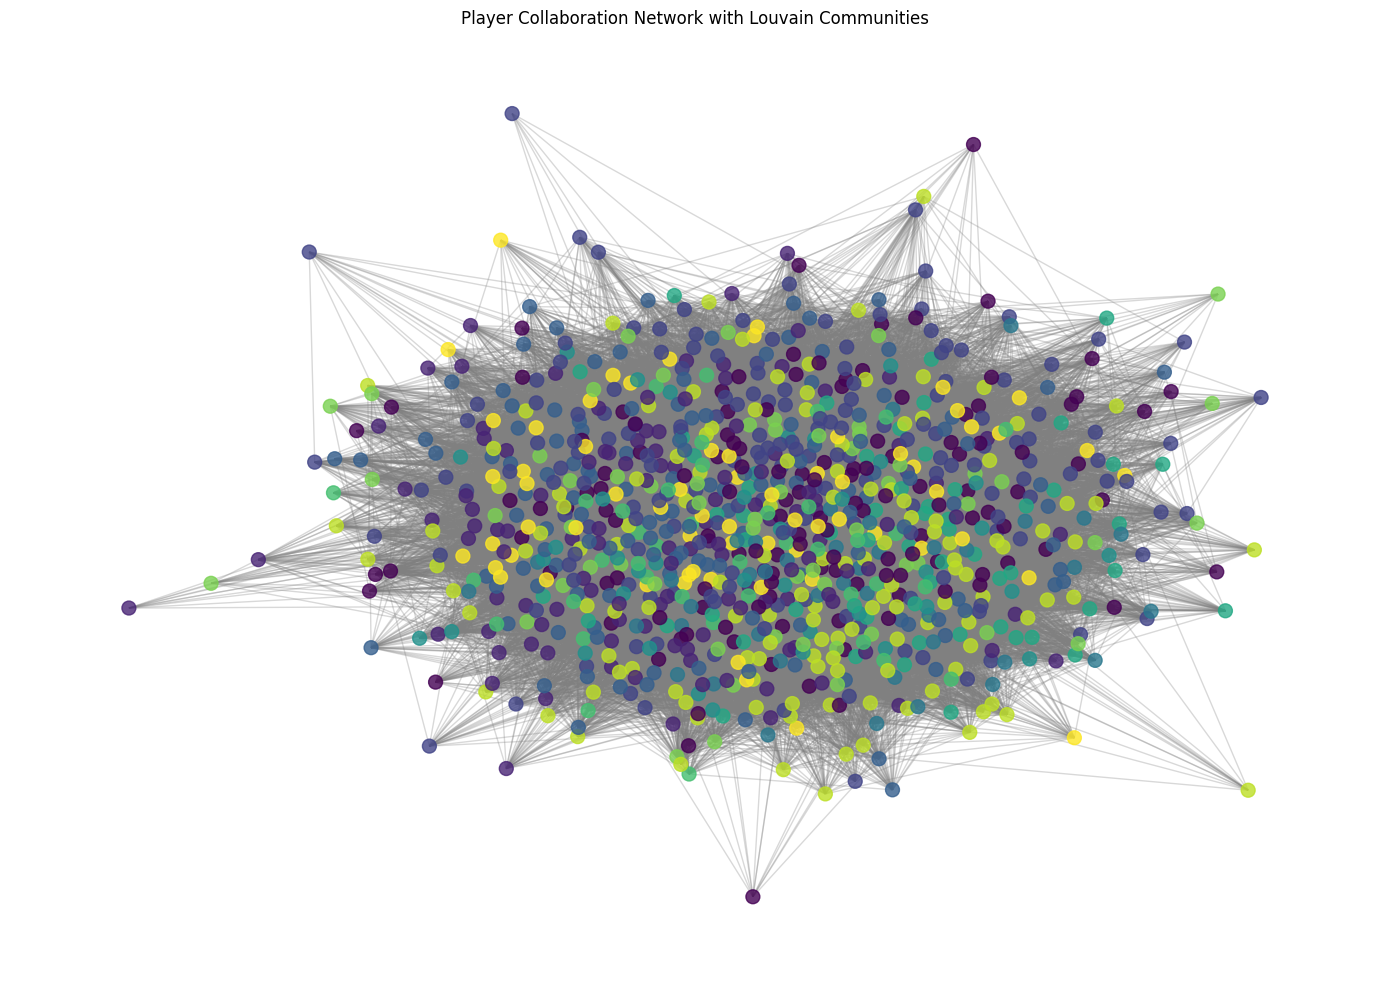

In [ ]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_collaboration, seed=42)

cmap = cm.get_cmap('viridis', len(communities))
node_colors = []

for node in G_collaboration.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_colors.append(cmap(i))
            break
    else:
        node_colors.append('gray')


nx.draw_networkx_nodes(G_collaboration, pos, node_size=100, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G_collaboration, pos, edge_color='gray', alpha=0.3)

plt.title("Player Collaboration Network with Louvain Communities")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import cm

# Step 1: Assign community labels to nodes (if not done already)
# Each node gets a 'community' attribute based on its membership
for i, community in enumerate(communities):
    for node in community:
        G_collaboration.nodes[node]['community'] = i

# Step 2: Extract top 3 largest communities
top_3_communities = sorted(communities, key=len, reverse=True)[:3]
top_3_nodes = set().union(*top_3_communities)
top3_subgraph = G_collaboration.subgraph(top_3_nodes)

# Step 3: Create layout and assign colors
pos = nx.spring_layout(top3_subgraph, seed=42)
cmap = cm.get_cmap('Set1', 3)
node_colors = []

# Create mapping from community index to color index (0, 1, 2)
top_3_ids = [G_collaboration.nodes[list(c)[0]]['community'] for c in top_3_communities]
community_id_to_color_index = {cid: idx for idx, cid in enumerate(top_3_ids)}

for node in top3_subgraph.nodes():
    comm_id = G_collaboration.nodes[node]['community']
    color_index = community_id_to_color_index.get(comm_id, 0)  # Default to 0 if not found
    node_colors.append(cmap(color_index))

# Step 4: Draw the network
plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(top3_subgraph, pos, node_size=100, node_color=node_colors, alpha=0.85)
nx.draw_networkx_edges(top3_subgraph, pos, edge_color='gray', alpha=0.3)

# Optional: Add legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=cmap(i), label=f"Community {i+1}") for i in range(3)]
plt.legend(handles=legend_handles, loc='best')

plt.title("Top 3 Largest Louvain Communities")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
modularity_score = nx.community.modularity(G_collaboration, communities, weight='weight')
print(f"Modularity of the Player Collaboration Network: {modularity_score:.4f}")

The Label Propagation

In [ ]:
print("Applying the Label Propagation algorithm for community detection...")

label_propagation_communities = list(nx.community.label_propagation_communities(G_collaboration))
print(f"Label Propagation algorithm found {len(label_propagation_communities)} communities.")

print("\nSample of detected communities (sorted by size):")
sorted_lp_communities = sorted(label_propagation_communities, key=len, reverse=True)

if 'player_id_to_username' not in locals():
    player_id_to_username = df_players.set_index('player_id')['username'].to_dict()

for i, community in enumerate(sorted_lp_communities[:5]):
    community_size = len(community)
    sample_members = list(community)[:10]
    sample_usernames = [player_id_to_username.get(player_id, player_id) for player_id in sample_members]
    print(f"  Community {i+1} (size {community_size}): Sample members: {sample_usernames}...")

Evaluating communities

In [ ]:
def compute_coverage(G, communities):
    intra_edges = 0
    total_edges = G.number_of_edges()

    for community in communities:
        subgraph = G.subgraph(community)
        intra_edges += subgraph.number_of_edges()

    return intra_edges / total_edges if total_edges > 0 else 0

In [ ]:
print("Evaluating Louvain Communities:")

coverage_score = compute_coverage(G_collaboration, communities)

conductances = []
for community in communities:
    if 0 < len(community) < len(G_collaboration):
        cond = conductance(G_collaboration, community)
        conductances.append(cond)

print(f"  Coverage: {coverage_score:.4f}")
if conductances:
    print(f"  Avg. Conductance: {np.mean(conductances):.4f}")
    print(f"  Min. Conductance: {np.min(conductances):.4f}")
    print(f"  Max. Conductance: {np.max(conductances):.4f}")
else:
    print("  Conductance not computed (community size issue)")

Evaluating Louvain Communities:
  Coverage: 0.2491
  Avg. Conductance: 0.7697
  Min. Conductance: 0.6998
  Max. Conductance: 0.8365


However, to calculate Normalized Mutual Information (NMI) and Adjusted Rand Index (ARI), you would typically need a set of "ground truth" or "true" community assignments for your nodes to compare against the communities detected by the algorithms. Since we don't have pre-defined "true" communities in this dataset, we cannot calculate NMI or ARI.

Clique Percolation Method (CPM) is popular for finding overlapping communities:

Find all k-cliques (fully connected subgraphs of k nodes)
Connect cliques that share k-1 nodes
Each connected component of cliques forms a community

In [ ]:
# Finding Overlapping Communities using Clique Percolation Method

# The Clique Percolation Method requires finding cliques (subgraphs where all nodes are connected to each other)
# and then merging cliques that share a certain number of nodes (k).

# We'll use the player collaboration network (G_collaboration) for this.

In [ ]:
k_value = 14

print(f"Finding {k_value}-cliques in the player collaboration network...")
k_cliques = list(nx.find_cliques(G_collaboration))

k_cliques = [clique for clique in k_cliques if len(clique) >= k_value]
print(f"Found {len(k_cliques)} cliques of size {k_value} or more.")

# Step 2: Construct the clique graph (optional but helpful for understanding)
# In the clique graph, nodes are k-cliques and edges connect cliques that share k-1 nodes.
# NetworkX doesn't have a direct clique percolation function, but we can manually
# implement the merging step or use the `k_clique_communities` function (which is
# an implementation of the clique percolation method).

print(f"\nFinding overlapping communities using {k_value}-clique percolation...")
try:
    overlapping_communities = list(nx.community.k_clique_communities(G_collaboration, k_value))
    print(f"Found {len(overlapping_communities)} overlapping communities.")

    print("\nSample of detected overlapping communities (sorted by size):")
    sorted_overlapping_communities = sorted(overlapping_communities, key=len, reverse=True)

    # if 'player_id_to_username' not in locals():
    #     player_id_to_username = df_players.set_index('player_id')['username'].to_dict()

    for i, community in enumerate(sorted_overlapping_communities[:5]):
        community_size = len(community)
        sample_members = list(community)[:10]
        sample_usernames = [player_id_to_username.get(player_id, player_id) for player_id in sample_members]
        print(f"  Overlapping Community {i+1} (size {community_size}): Sample members: {sample_usernames}...")

except nx.NetworkXAlgorithmError as e:
    print(f"Could not find overlapping communities with k={k_value}. Try a smaller k value. Error: {e}")
except Exception as e:
    print(f"An error occurred during overlapping community detection: {e}")

Finding 14-cliques in the player collaboration network...
Found 263 cliques of size 14 or more.

Finding overlapping communities using 14-clique percolation...
Found 262 overlapping communities.

Sample of detected overlapping communities (sorted by size):
  Overlapping Community 1 (size 28): Sample members: ['vhayesmanm5', 'mshiliton4g', 'gwickwarthhn', 'nmottinellil2', 'twardenkp', 'adonnr6', 'dfurzer49', 'kdevereued', 'crichichia2', 'krogeon95']...
  Overlapping Community 2 (size 25): Sample members: ['tseabertfg', 'tballefantec', 'cjarad8p', 'ktrightongk', 'fdaniellskn', 'kdeveralene', 'aprewrj', 'nfittis7z', 'mduthieh2', 'nclingoekh']...
  Overlapping Community 3 (size 25): Sample members: ['jlabuschagnee9', 'ktownend9p', 'acharitym4', 'stoderie2', 'ekingwelll', 'mheinmp', 'tvisickno', 'vberzenoe', 'channiganm2', 'dfoggartyha']...
  Overlapping Community 4 (size 25): Sample members: ['rhallam1b', 'rtrundlem9', 'jgorcke4p', 'tdomerck', 'mdunkersleyr', 'nrandlesomegc', 'klewton2b', 

In [ ]:
for k in range(5, 11):
    try:
        communities = list(nx.community.k_clique_communities(G, k))
        print(f"k={k}: {len(communities)} communities")
    except nx.NetworkXAlgorithmError:
        print(f"k={k}: No communities found")

In [ ]:
# Example for k=8
communities = list(nx.community.k_clique_communities(G, 8))
community_sizes = [len(c) for c in communities]
print("Median community size:", sorted(community_sizes)[len(community_sizes)//2])

Median community size: 14


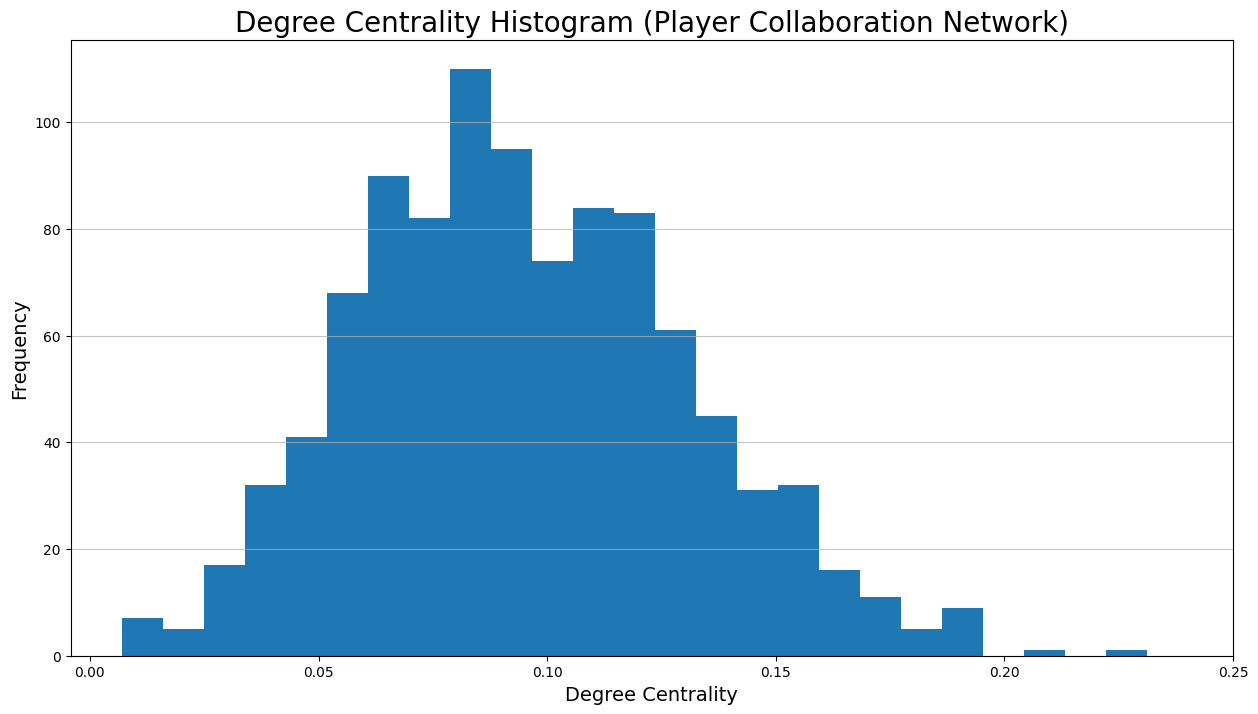

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality_collaboration.values(), bins=25)
# Adjusting ticks based on the range of degree centrality values observed earlier
plt.xticks(ticks=[0, 0.05, 0.10, 0.15, 0.20, 0.25])
plt.title("Degree Centrality Histogram (Player Collaboration Network)", fontdict={"size": 20}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 14})
plt.ylabel("Frequency", fontdict={"size": 14})
plt.grid(axis='y', alpha=0.75)
plt.show()

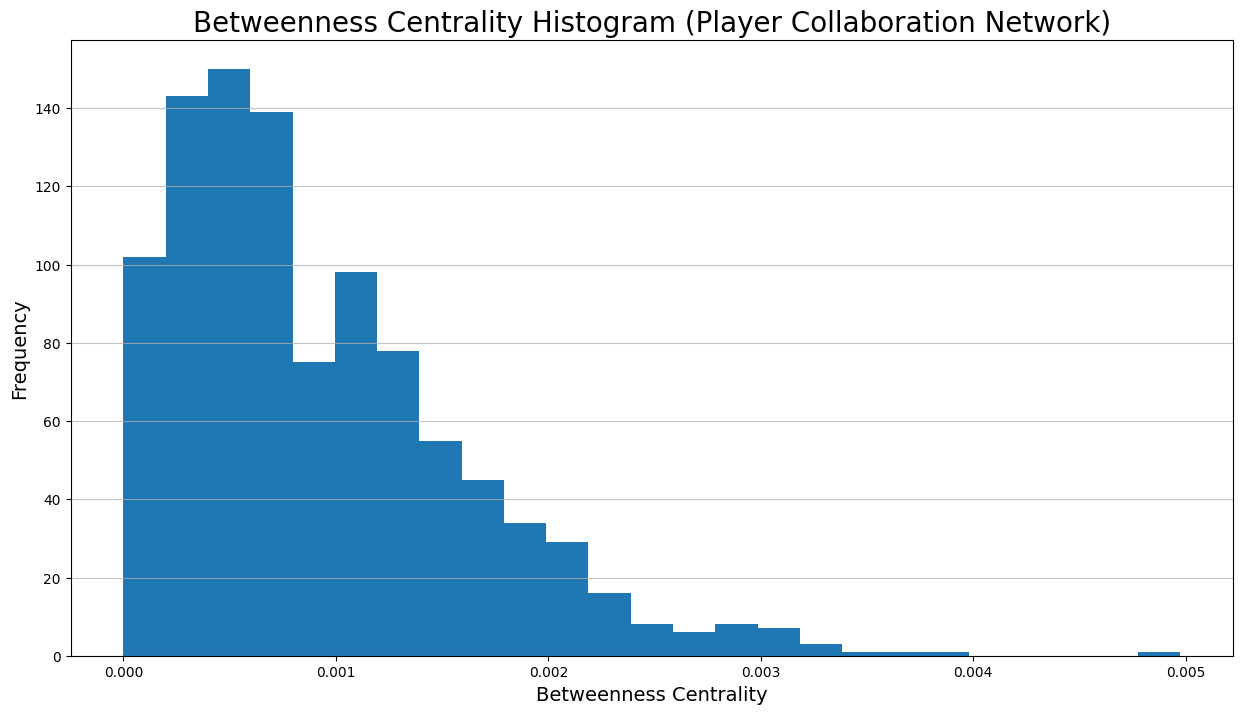

In [24]:
plt.figure(figsize=(15, 8))
plt.hist(player_betweenness_centrality.values(), bins=25)
# Adjusting ticks based on the range of degree centrality values observed earlier
plt.title("Betweenness Centrality Histogram (Player Collaboration Network)", fontdict={"size": 20}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 14})
plt.ylabel("Frequency", fontdict={"size": 14})
plt.grid(axis='y', alpha=0.75)
plt.show()

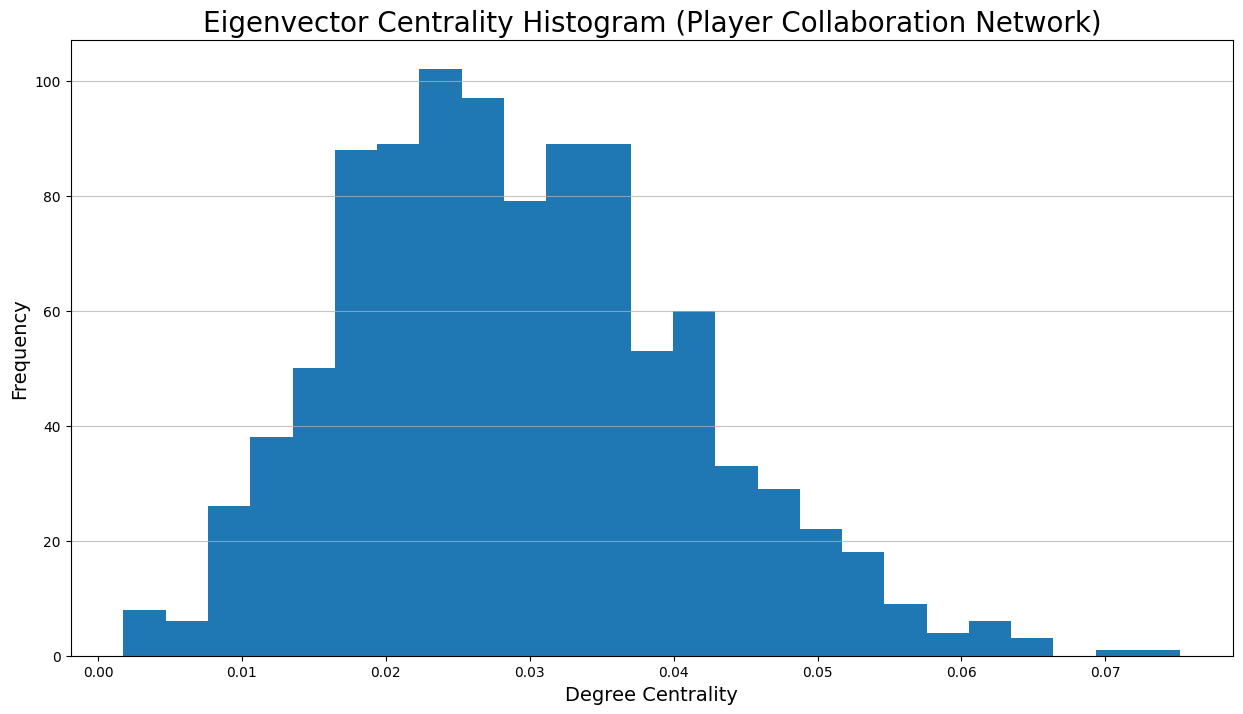

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(player_eigenvector_centrality.values(), bins=25)
# Adjusting ticks based on the range of degree centrality values observed earlier
plt.title("Eigenvector Centrality Histogram (Player Collaboration Network)", fontdict={"size": 20}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 14})
plt.ylabel("Frequency", fontdict={"size": 14})
plt.grid(axis='y', alpha=0.75)
plt.show()

Text(0, 0.5, 'Counts')

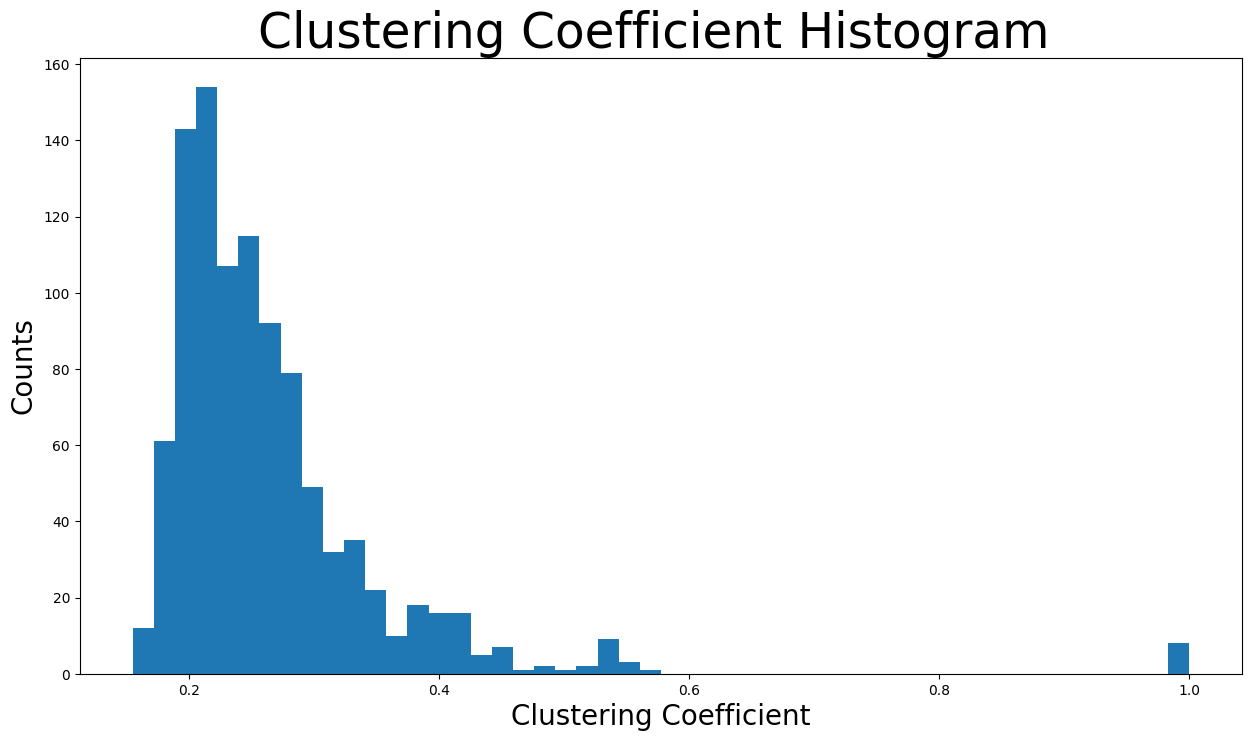

In [ ]:
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G_collaboration).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})